In [1]:
import tensorflow as tf
import os
import cv2
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = tf.keras.utils.image_dataset_from_directory('SpiralData', batch_size = 14, color_mode='grayscale')

Found 140 files belonging to 2 classes.


In [3]:
data_iterator = data.as_numpy_iterator()

In [4]:
batch = data_iterator.next()

In [5]:
batch[1]

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

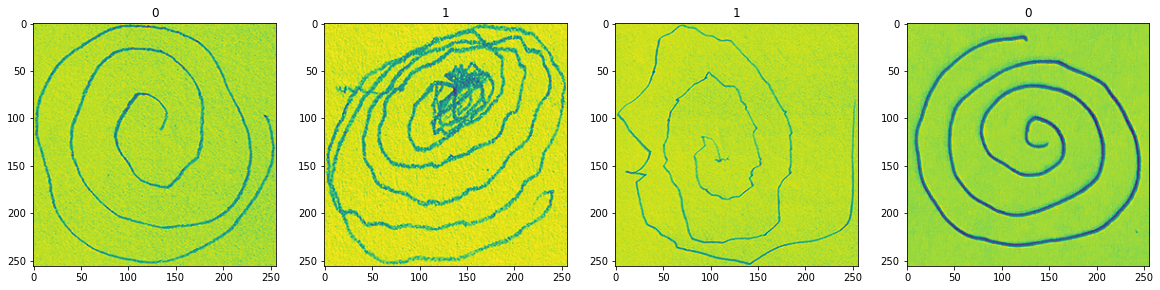

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
data = data.map(lambda x, y : (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [8]:
scaled_iterator = data.as_numpy_iterator()

In [9]:
batch = scaled_iterator.next()

In [10]:
batch[0]

array([[[[0.9529412 ],
         [0.9647059 ],
         [0.9490196 ],
         ...,
         [0.9529412 ],
         [0.9490196 ],
         [0.9411765 ]],

        [[0.9372549 ],
         [0.9490196 ],
         [0.95686275],
         ...,
         [0.9019608 ],
         [0.9411765 ],
         [0.9254902 ]],

        [[0.9411765 ],
         [0.91764706],
         [0.92941177],
         ...,
         [0.8862745 ],
         [0.91764706],
         [0.9137255 ]],

        ...,

        [[0.9254902 ],
         [0.91764706],
         [0.9137255 ],
         ...,
         [0.9098039 ],
         [0.90588236],
         [0.9137255 ]],

        [[0.93333334],
         [0.92941177],
         [0.93333334],
         ...,
         [0.9137255 ],
         [0.91764706],
         [0.9098039 ]],

        [[0.9490196 ],
         [0.94509804],
         [0.95686275],
         ...,
         [0.92156863],
         [0.9372549 ],
         [0.93333334]]],


       [[[0.9411765 ],
         [0.9411765 ],
         [0.92

In [11]:
print("Min value after scaling is ", batch[0].min())
print("Max value after scaling is ", batch[0].max())

Min value after scaling is  0.0
Max value after scaling is  1.0


In [12]:
len(data)

10

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train_size+val_size+test_size

10

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256,256,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 average_pooling2d (AverageP  (None, 126, 126, 64)     0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 flatten (Flatten)           (None, 1016064)           0         
                                                                 
 dense (Dense)               (None, 128)               130056320 
                                                        

In [22]:
hist = model.fit(train, validation_data=val, epochs=15)

Epoch 1/15
7/7 [==============================] - 37s 5s/step - loss: 6.7836 - accuracy: 0.4286 - val_loss: 0.8178 - val_accuracy: 0.6071
Epoch 2/15
7/7 [==============================] - 28s 4s/step - loss: 0.8257 - accuracy: 0.5612 - val_loss: 0.6220 - val_accuracy: 0.6071
Epoch 3/15
7/7 [==============================] - 28s 4s/step - loss: 0.5871 - accuracy: 0.6224 - val_loss: 0.4833 - val_accuracy: 0.6786
Epoch 4/15
7/7 [==============================] - 28s 4s/step - loss: 0.3991 - accuracy: 0.7959 - val_loss: 1.9656 - val_accuracy: 0.6071
Epoch 5/15
7/7 [==============================] - 28s 4s/step - loss: 0.5736 - accuracy: 0.7959 - val_loss: 0.2483 - val_accuracy: 0.9643
Epoch 6/15
7/7 [==============================] - 28s 4s/step - loss: 0.2798 - accuracy: 0.8980 - val_loss: 0.1972 - val_accuracy: 0.8929
Epoch 7/15
7/7 [==============================] - 28s 4s/step - loss: 0.1548 - accuracy: 0.9388 - val_loss: 0.1043 - val_accuracy: 0.9286
Epoch 8/15
7/7 [==================

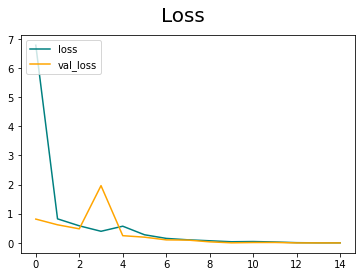

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

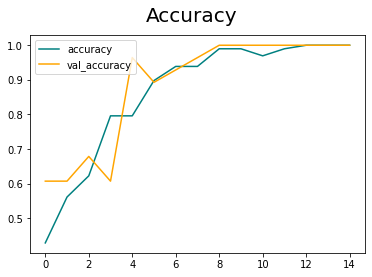

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [25]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [26]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [27]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 363ms/step


In [28]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:1.0, Recall: 1.0, Accuracy: 1.0


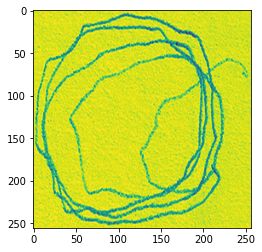

In [280]:
img = cv2.imread('PARK06.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

In [281]:
img = cv2.resize(img, (256, 256))
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)
img.shape

(1, 256, 256, 1)

In [282]:
yhat = model.predict(img)

1/1 [==============================] - 0s 176ms/step


In [283]:
if (yhat<0.5):
    print("Healthy")
else:
    print("Parkinson")

Parkinson


In [144]:
from tensorflow.keras.models import load_model

In [145]:
new_model = load_model('models/AVGPOOL_PARKV04.h5')

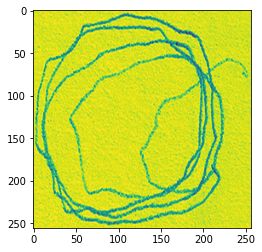

In [284]:
img = cv2.imread('PARK06.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

In [285]:
img = cv2.resize(img, (256, 256))
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)
img.shape

(1, 256, 256, 1)

In [286]:
yhat = new_model.predict(img)

1/1 [==============================] - 0s 186ms/step


In [287]:
if (yhat<0.5):
    print("Healthy")
else:
    print("Parkinson")


Healthy
